## California House Price Prediction

# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Exploratory Data Analysis

In [2]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\train housing.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Data Visualisation

array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

<Figure size 640x480 with 0 Axes>

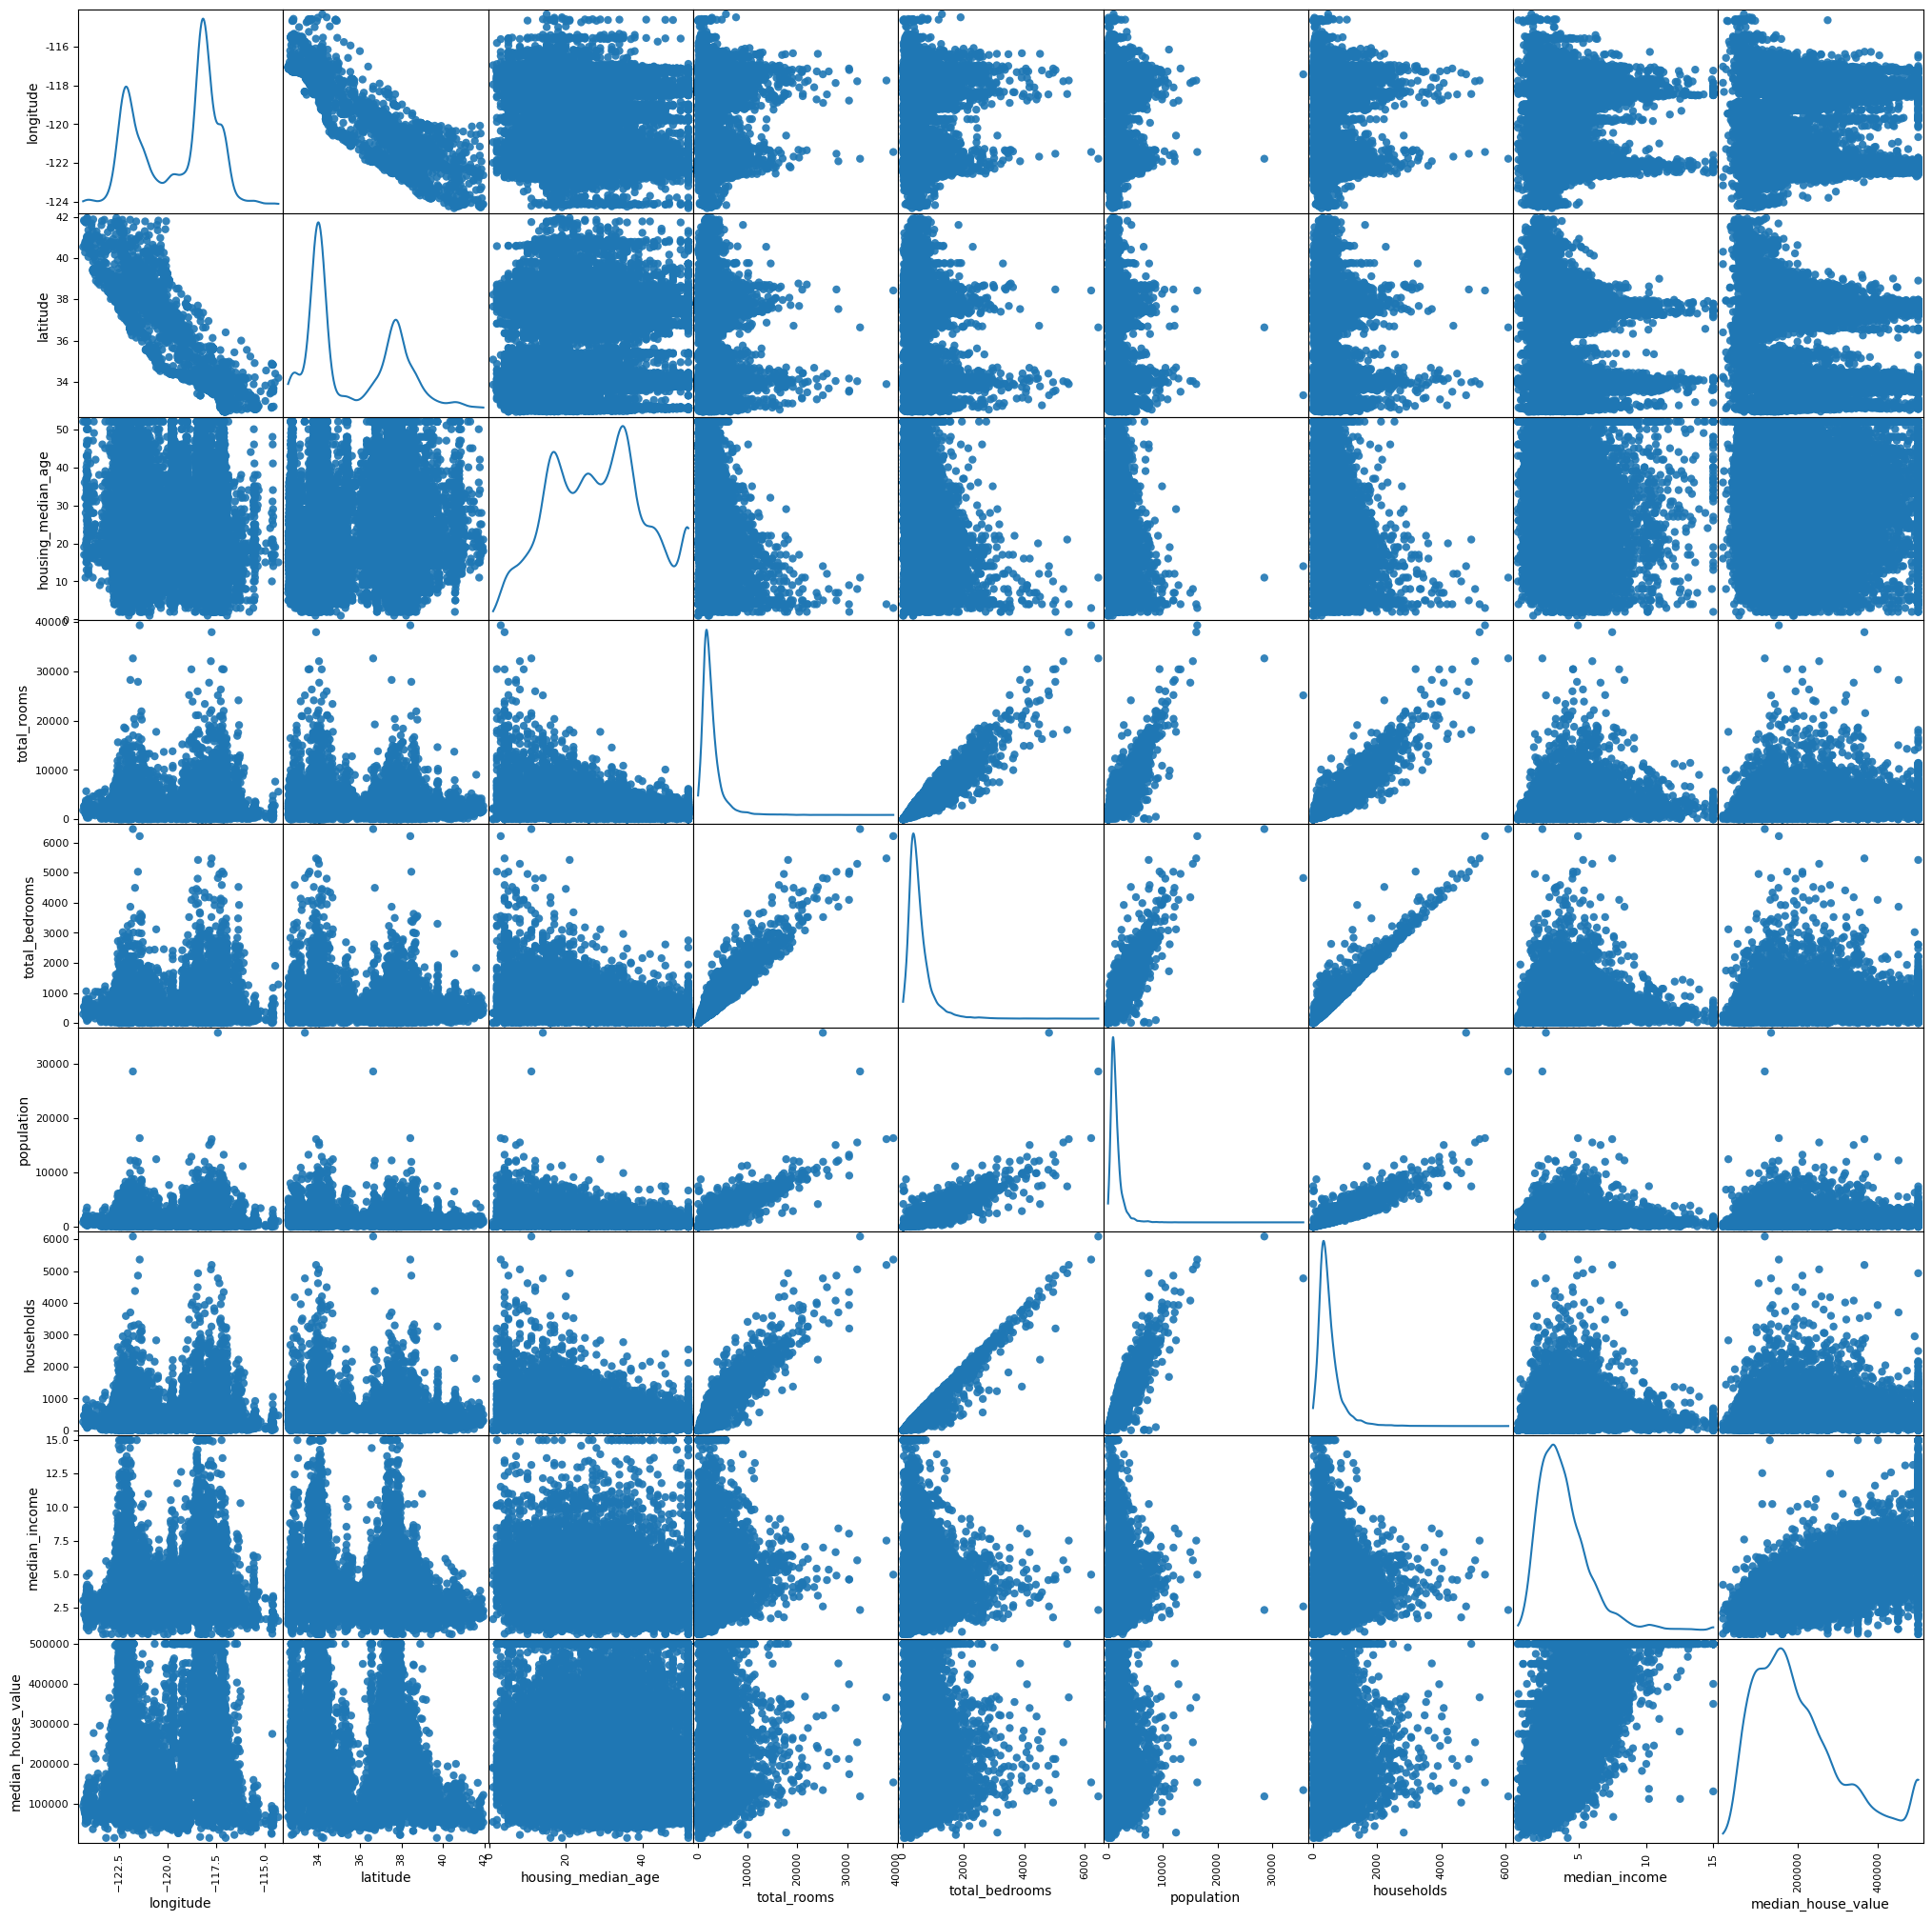

In [9]:
fig = plt.figure()
scatter_matrix(df,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o")

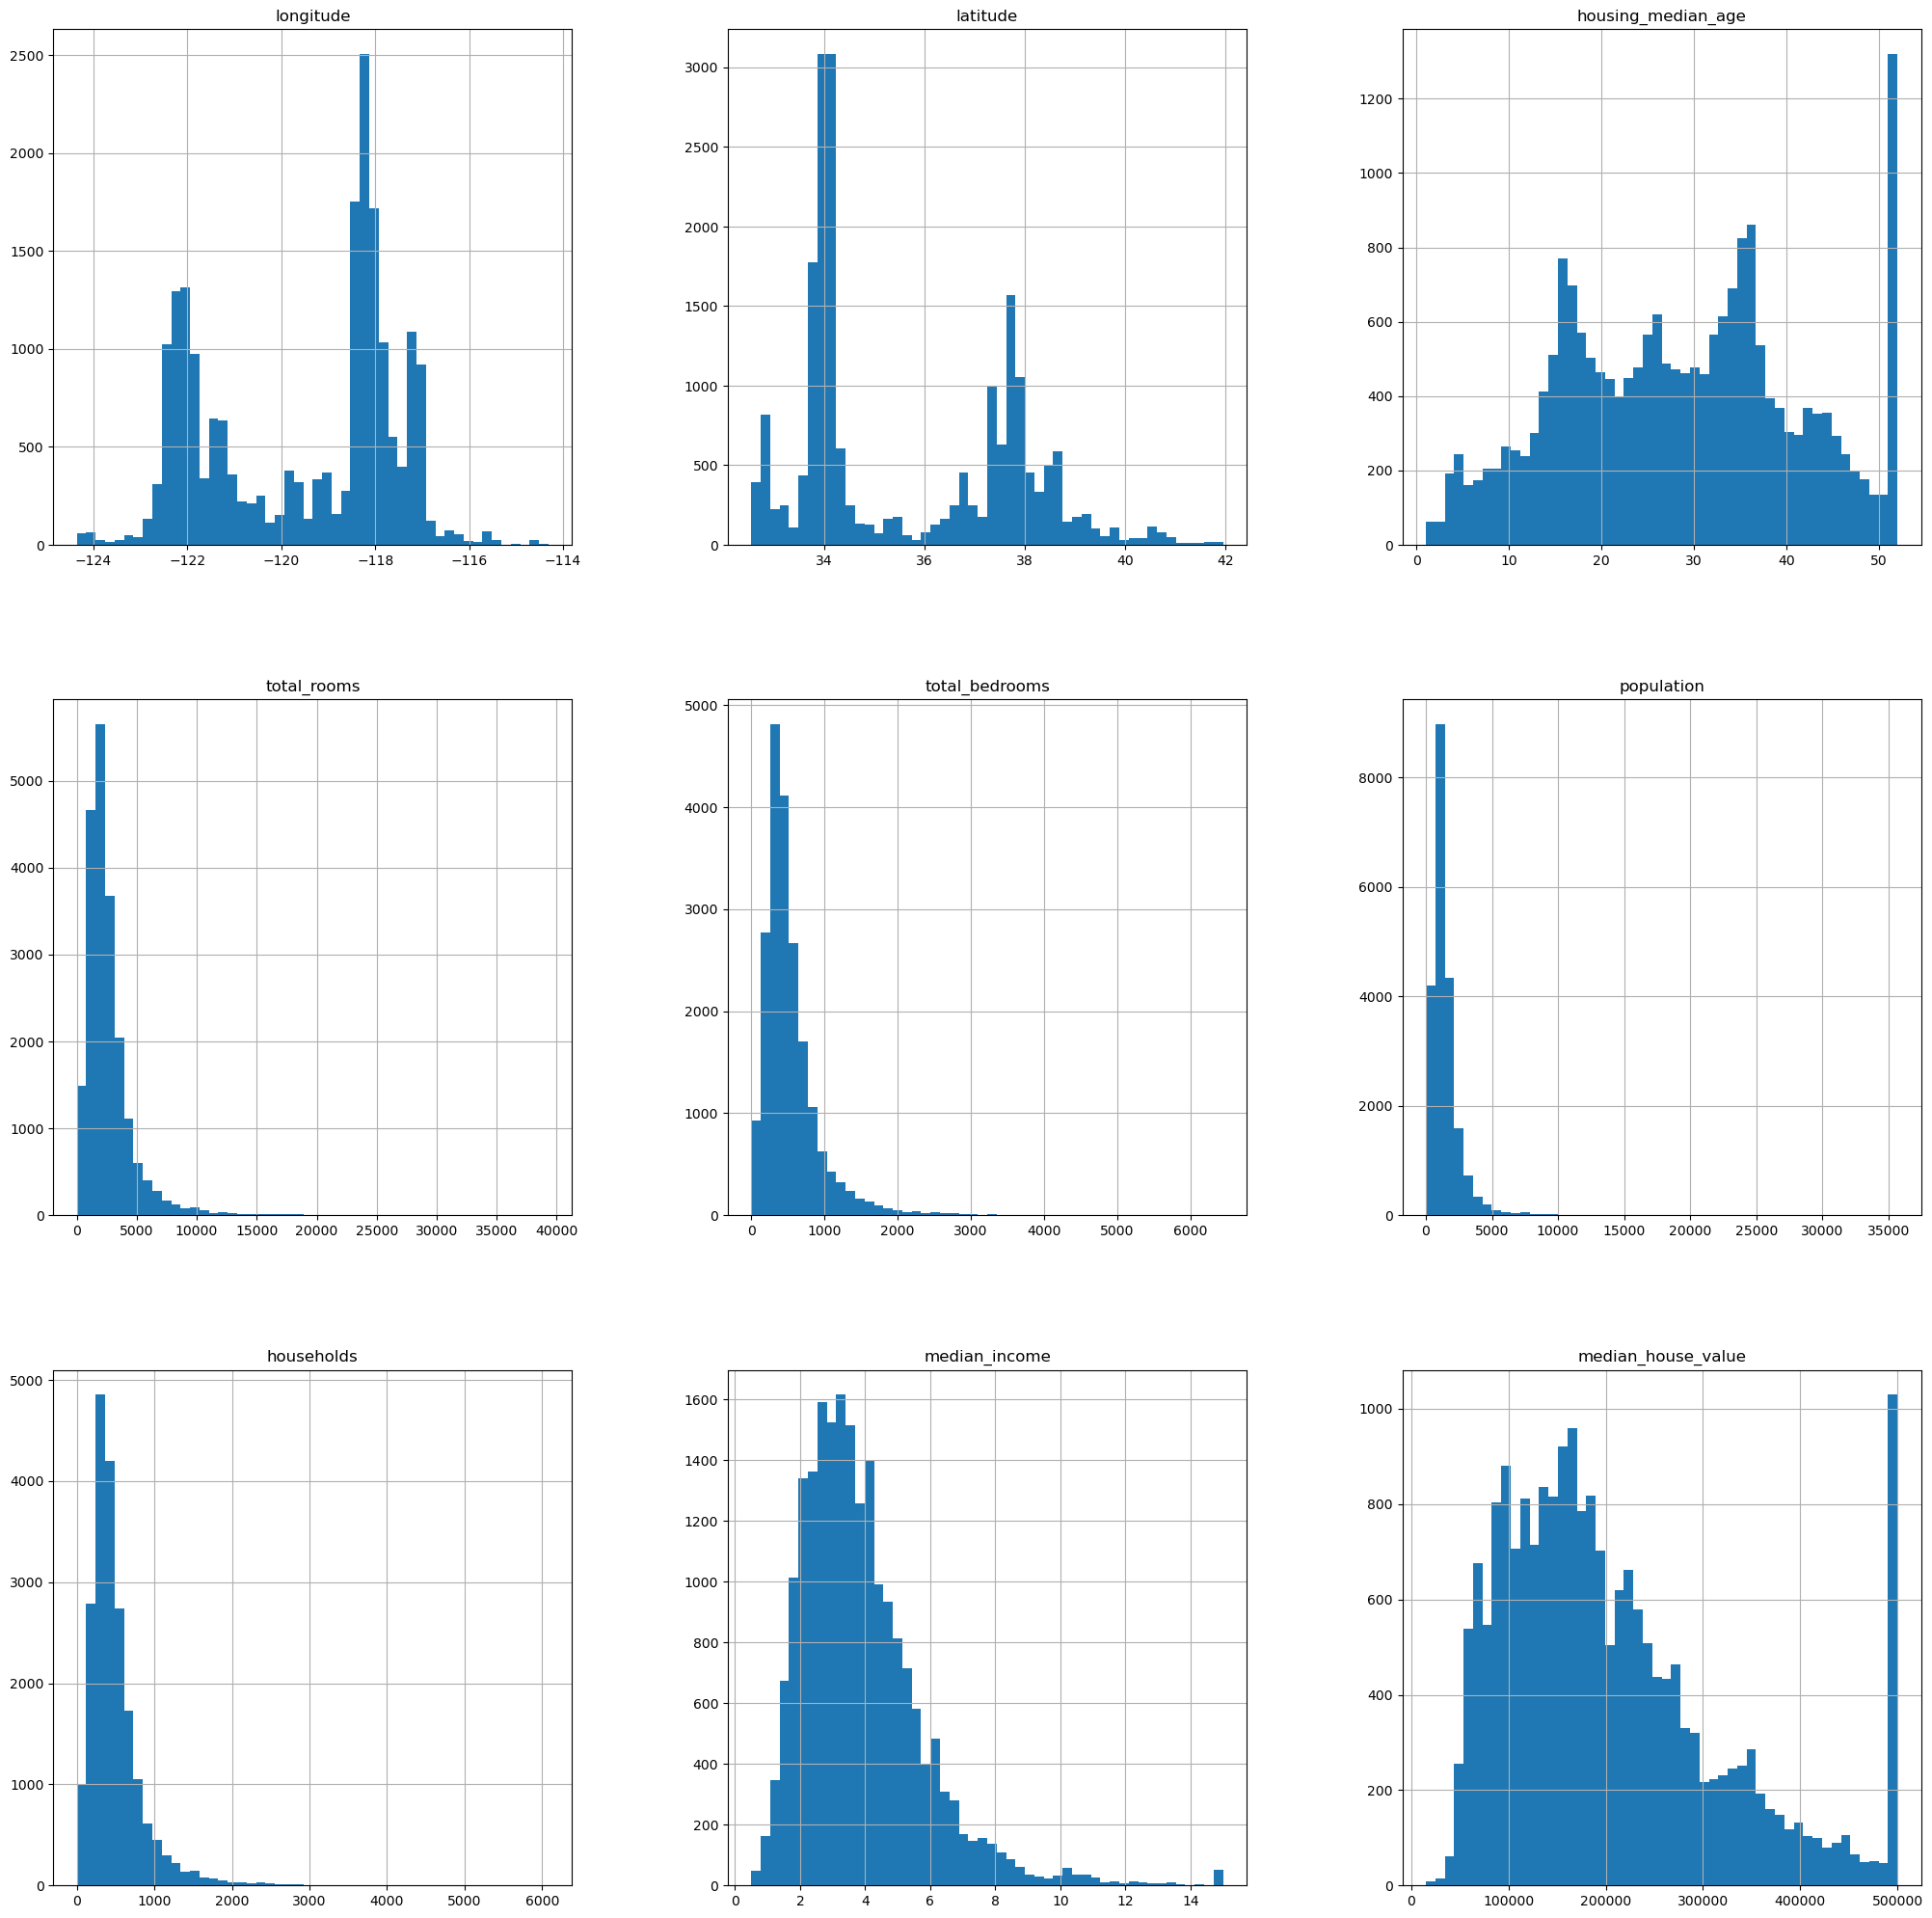

In [10]:
df.hist(figsize=(25,25),bins=50);

In [11]:
hcorr = df.corr()
hcorr.style.background_gradient()

C:\Users\hp\AppData\Local\Temp\ipykernel_19420\1568616695.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hcorr = df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_19420\2784857208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_corr_matrix =df.corr()


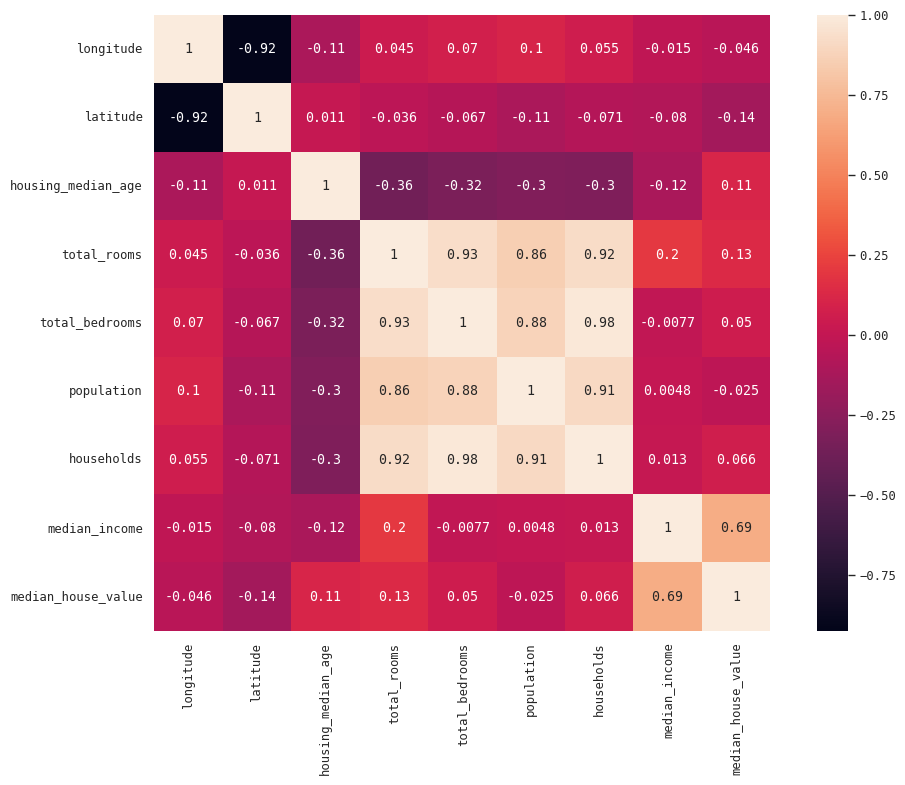

In [12]:
sns.set(context="paper",font="monospace")
housing_corr_matrix =df.corr()
fig, axe = plt.subplots(figsize=(12,8))
sns.heatmap(housing_corr_matrix,vmax=1,square =True ,annot=True );

In [13]:
df=df.dropna()

In [14]:
labelEncoder = LabelEncoder()
print(df["ocean_proximity"].value_counts())
df["ocean_proximity"] = labelEncoder.fit_transform(df["ocean_proximity"])
df["ocean_proximity"].value_counts()
df.describe()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [15]:
housing_ind = df.drop("median_house_value",axis=1)
print(housing_ind.head())
housing_dep = df["median_house_value"]
print("Medain Housing Values")
print(housing_dep.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity  
0       322.0       126.0         8.3252                3  
1      2401.0      1138.0         8.3014                3  
2       496.0       177.0         7.2574                3  
3       558.0       219.0         5.6431                3  
4       565.0       259.0         3.8462                3  
Medain Housing Values
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [16]:
X_train,X_test,y_train,y_test = train_test_split(housing_ind,housing_dep,test_size=0.2,random_state=42)
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16346, 9) and size 147114
X_test shape (4087, 9) and size 36783
y_train shape (16346,) and size 16346
y_test shape (4087,) and size 4087


In [17]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,1
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,1
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,4


# Standardization

In [18]:
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[-1.10651441  0.78620804 -1.16206244  0.82931106  0.92929666  1.13110981
   1.04074393  0.43841173 -0.82241562]
 [-0.02467137  0.46787317  0.34865716 -0.73855806 -0.85052345 -0.7088994
  -0.85615229 -0.24238852 -0.12020053]
 [ 0.75804456 -0.71183841 -0.2874353   0.58735021  0.74724238  0.37845927
   0.69152454 -0.10896853 -0.12020053]
 [ 0.63340827 -0.73524539 -0.04890063 -0.12274217  0.98918293  1.18512356
   1.04868073 -0.86116849 -0.82241562]
 [ 1.15189525 -1.21742909 -0.12841219 -0.36563185 -0.34508329 -0.10500803
  -0.24766396 -0.16898645  1.98644475]]
test data
[[ 1.16685161 -1.33446397 -0.68499309 -0.77338928 -0.6181647  -0.79301917
  -0.64450418 -0.36195011  1.98644475]
 [-0.85225636  1.10922431 -2.11620113  1.75396373  1.38922326  1.68807122
   1.21535362  0.32480451 -0.12020053]
 [ 0.71816095 -0.80546631  0.18963404  0.51304362  0.75921964  0.79020339
   0.8026398  -0.34092539 -0.82241562]
 [-1.2411216   1.07645454  0.11012249 -0.63452883 -0.62295561 -0.63186341
  -0.7318090

# Linear Regression Model

In [19]:
linearRegModel = LinearRegression(n_jobs=-1)
linearRegModel.fit(X_train,y_train)
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is 206644.4000978828
coefficients  is [-85786.96930953 -90748.67284603  14548.78724736 -18030.45613034
  48408.76930712 -41646.35936368  15673.5278147   76403.23016686
   -561.22223864]


In [20]:
y_pred = linearRegModel.predict(X_test)

In [21]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

4087
4087
[195854.43379086 157564.349841   202476.8302992  173038.26811323
 214022.31040522]
14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
Name: median_house_value, dtype: float64


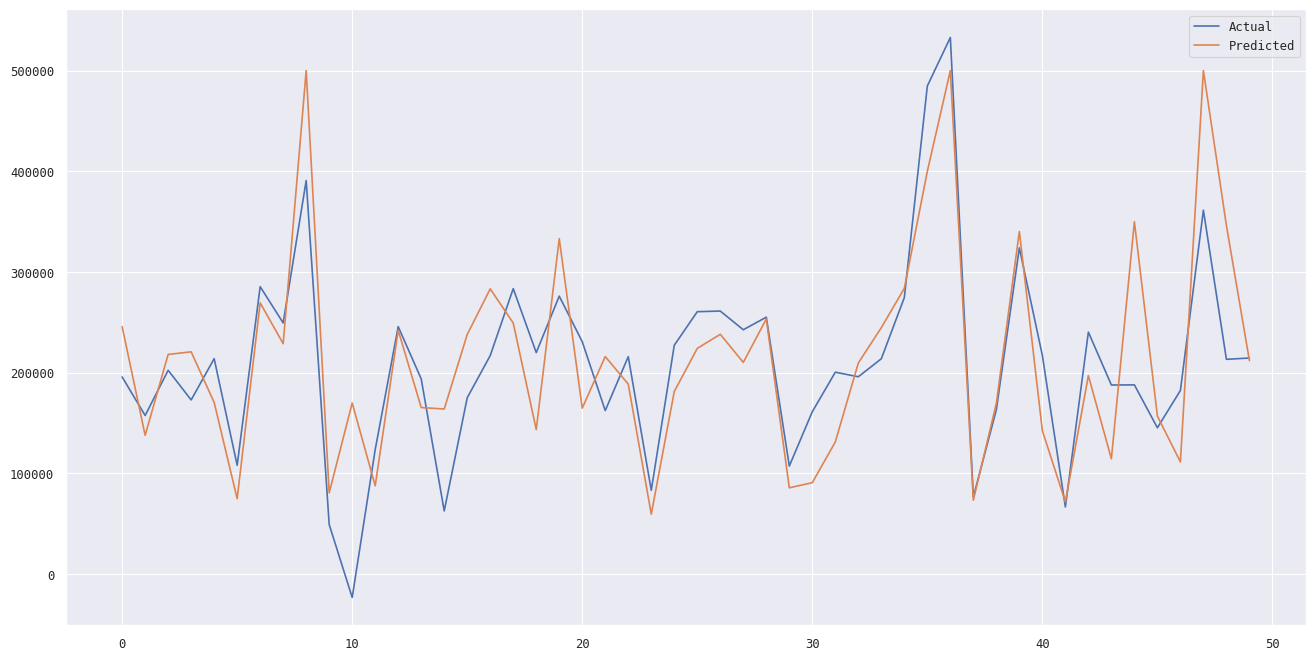

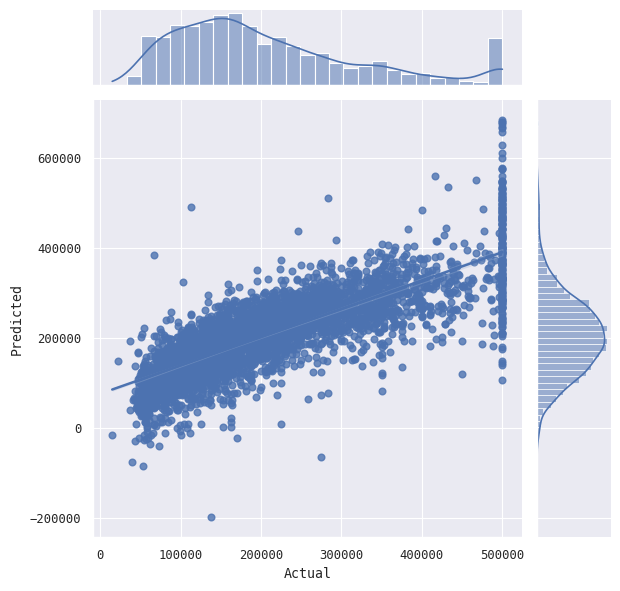

In [36]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

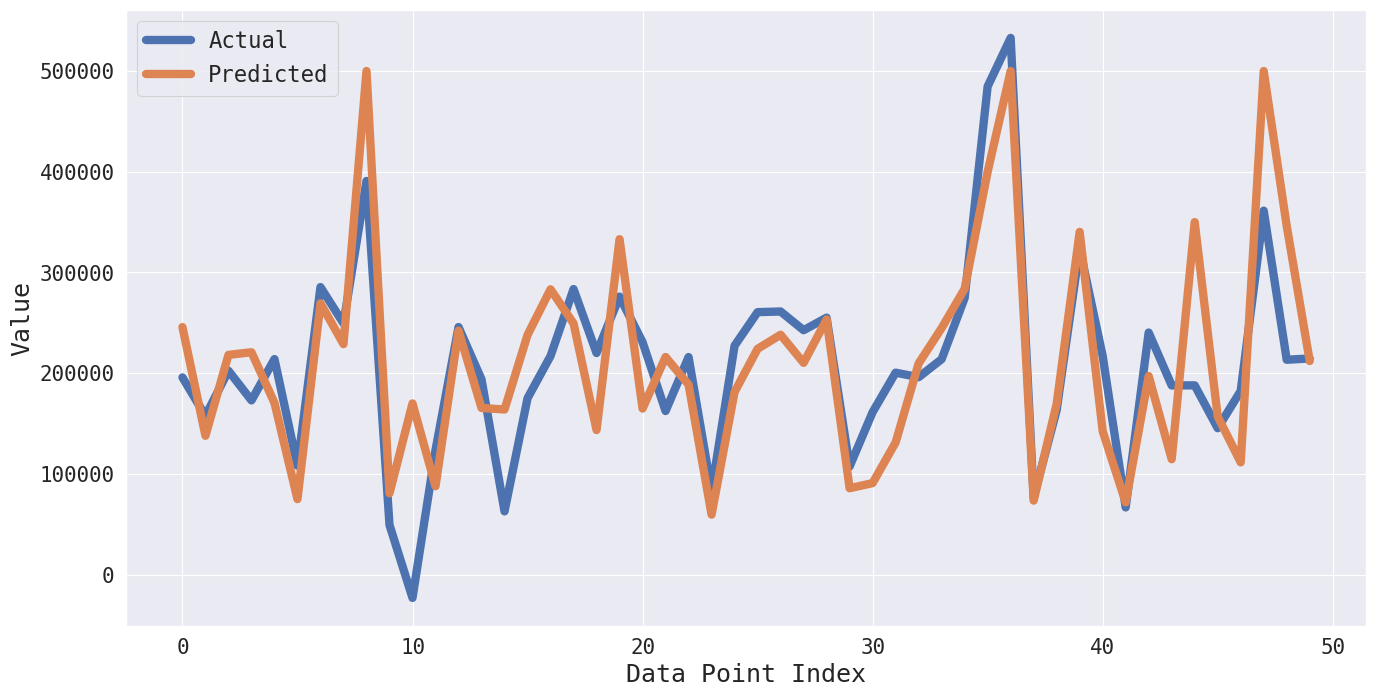

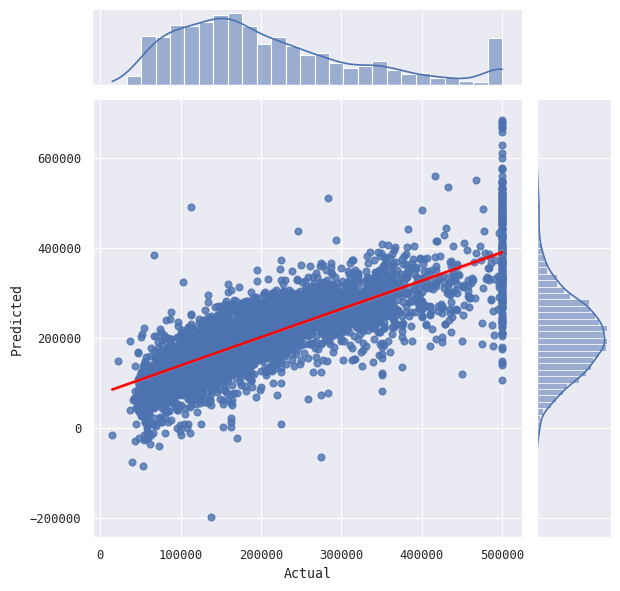

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(test[:50], linewidth=6)  
ax.set_xlabel('Data Point Index',fontsize=18)
ax.set_ylabel('Value',fontsize=18)
ax.legend(['Actual', 'Predicted'],fontsize=16)

ax.tick_params(axis='both', labelsize=15)
ax.grid(True)

sns.jointplot(x='Actual', y='Predicted', data=test, kind='reg',line_kws={"color": "red"})

plt.show()

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
print(mean_squared_error(y_test,y_pred))

4924108937.911958


In [26]:
print(np.sqrt(mean_squared_error(y_train,linearRegModel.predict(X_train))))

69409.69625821078


# Decision Tree

In [27]:
dtree = DecisionTreeRegressor(max_depth=9)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [38]:
dtree_y_pred = dtree.predict(X_test)
dtree_y_pred

array([252394.11363636, 160493.29896907, 215541.88034188, ...,
        78690.99099099, 135937.85069444, 114388.37209302])

In [39]:
print(len(dtree_y_pred))
print(len(y_test))
print(dtree_y_pred[0:5])
print(y_test[0:5])

4087
4087
[252394.11363636 160493.29896907 215541.88034188 125750.
 160493.29896907]
14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
Name: median_house_value, dtype: float64


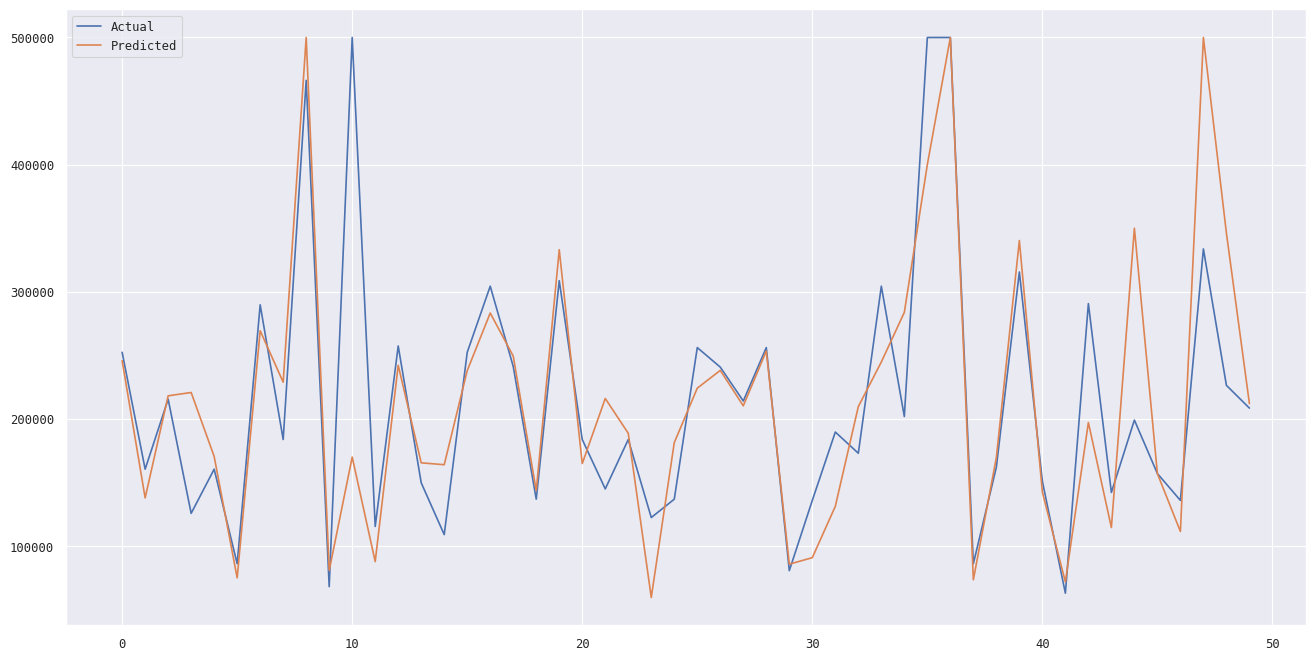

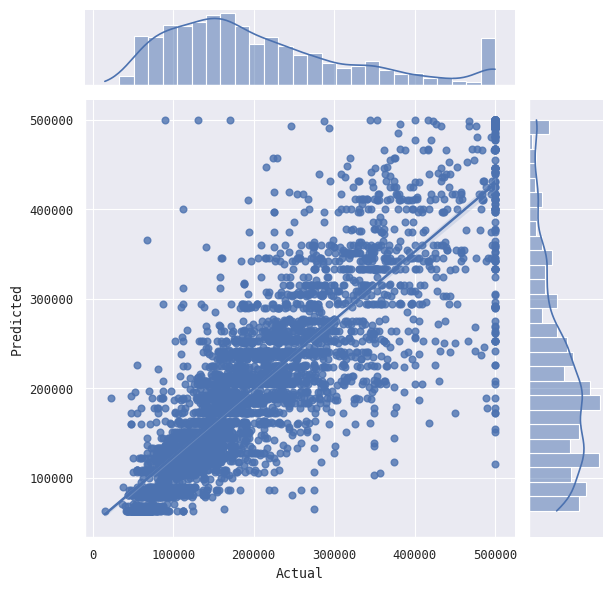

In [41]:
test = pd.DataFrame({'Predicted':dtree_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

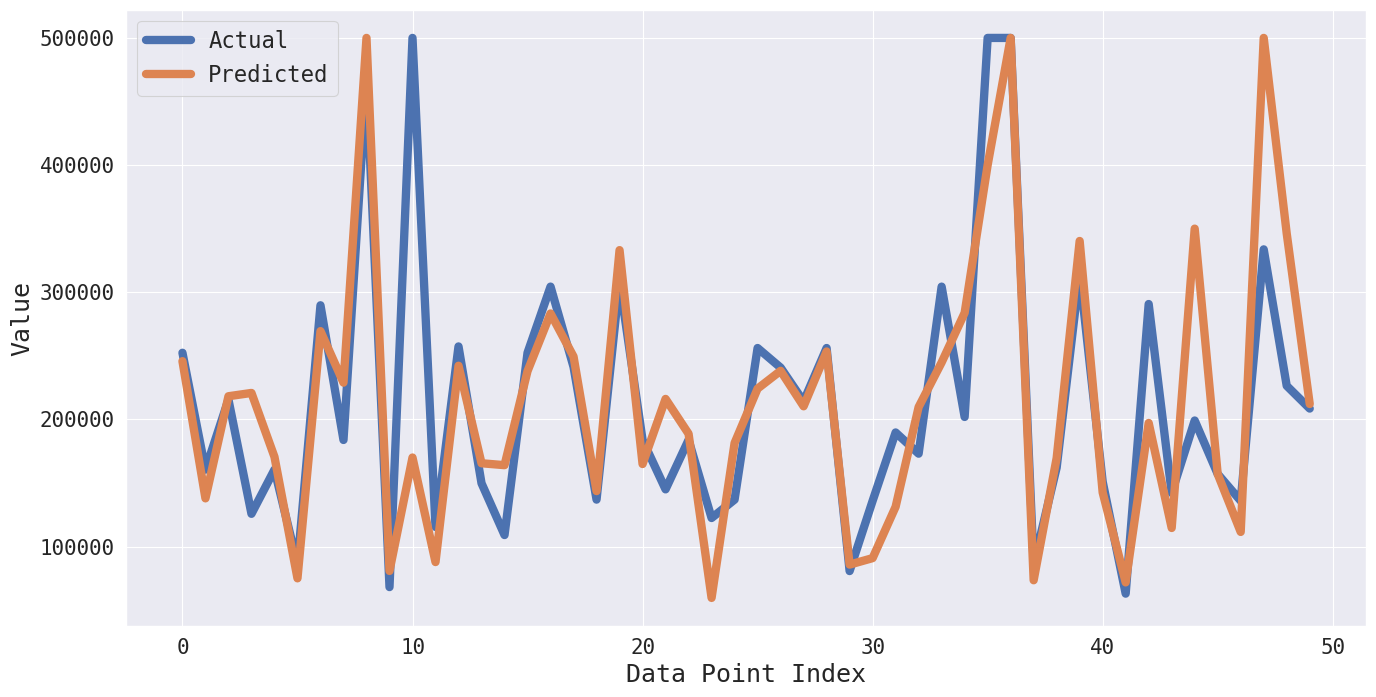

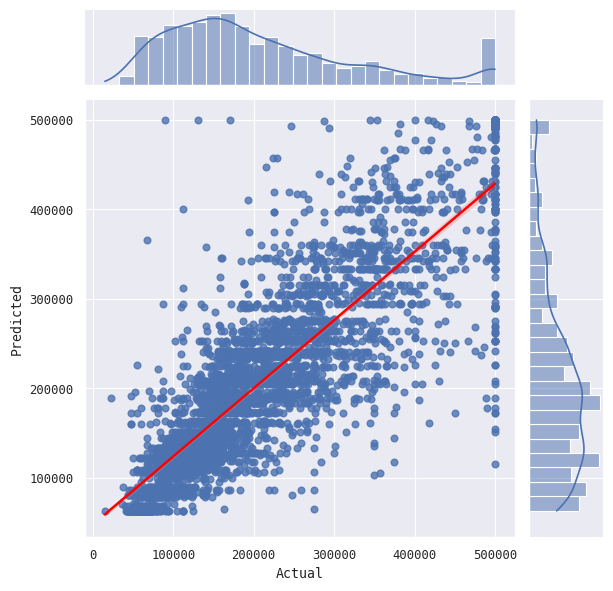

In [31]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(test[:50], linewidth=6) 

ax.set_xlabel('Data Point Index',fontsize=18)
ax.set_ylabel('Value',fontsize=18)
ax.legend(['Actual', 'Predicted'],fontsize=16)
ax.tick_params(axis='both', labelsize=15) 
ax.grid(True)

sns.jointplot(x='Actual', y='Predicted', data=test, kind='reg',line_kws={"color": "red"})

plt.show()

## Random Forest

In [32]:
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [42]:
rfReg_y_pred = rfReg.predict(X_test)
print(len(rfReg_y_pred))
print(len(y_test))
print(rfReg_y_pred[0:5])
print(y_test[0:5])

4087
4087
[227123.33333333 159736.66666667 206196.66666667 142433.33333333
 163183.33333333]
14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
Name: median_house_value, dtype: float64


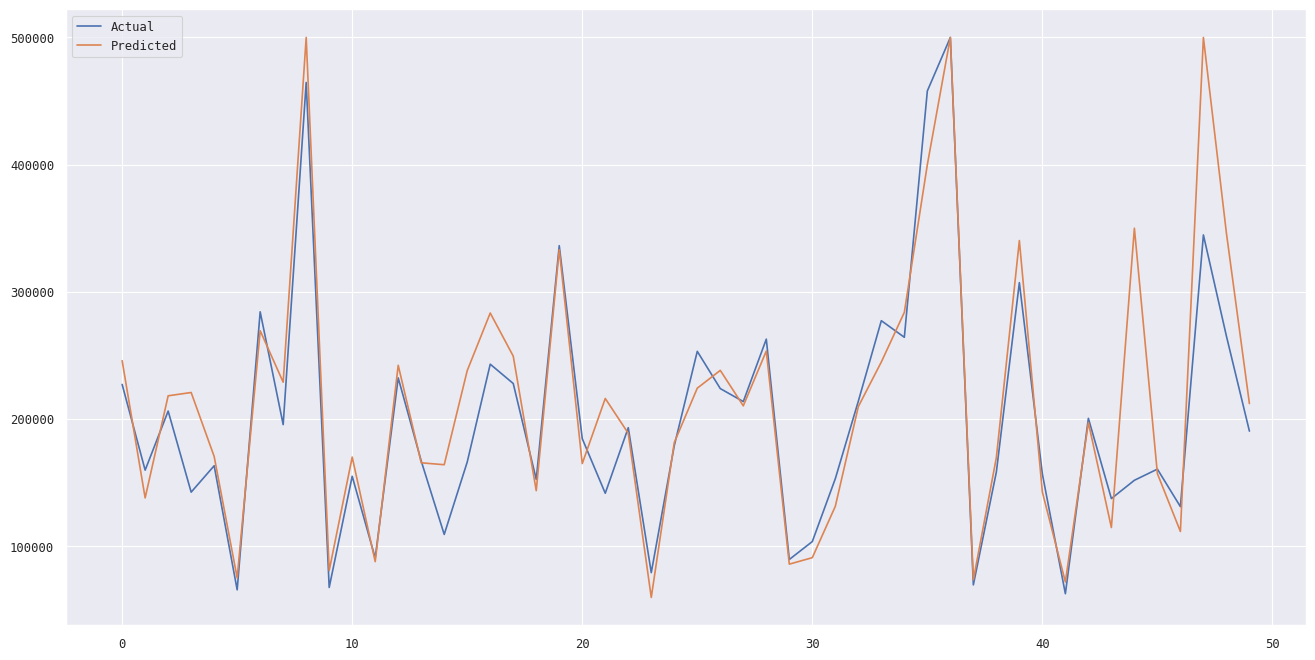

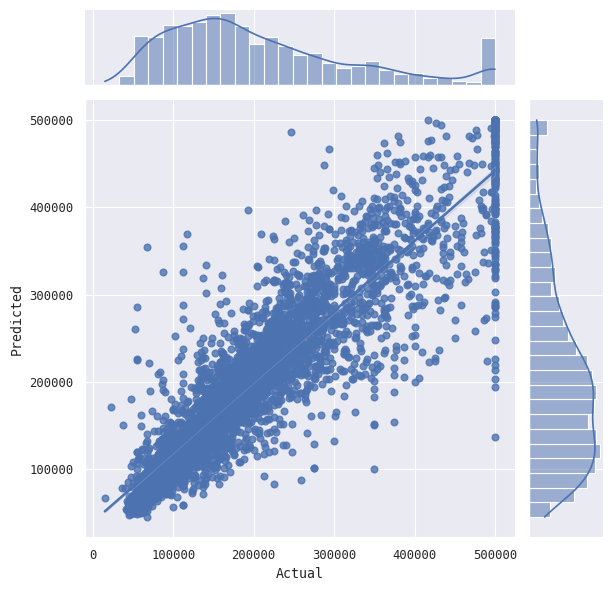

In [44]:
test = pd.DataFrame({'Predicted':rfReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

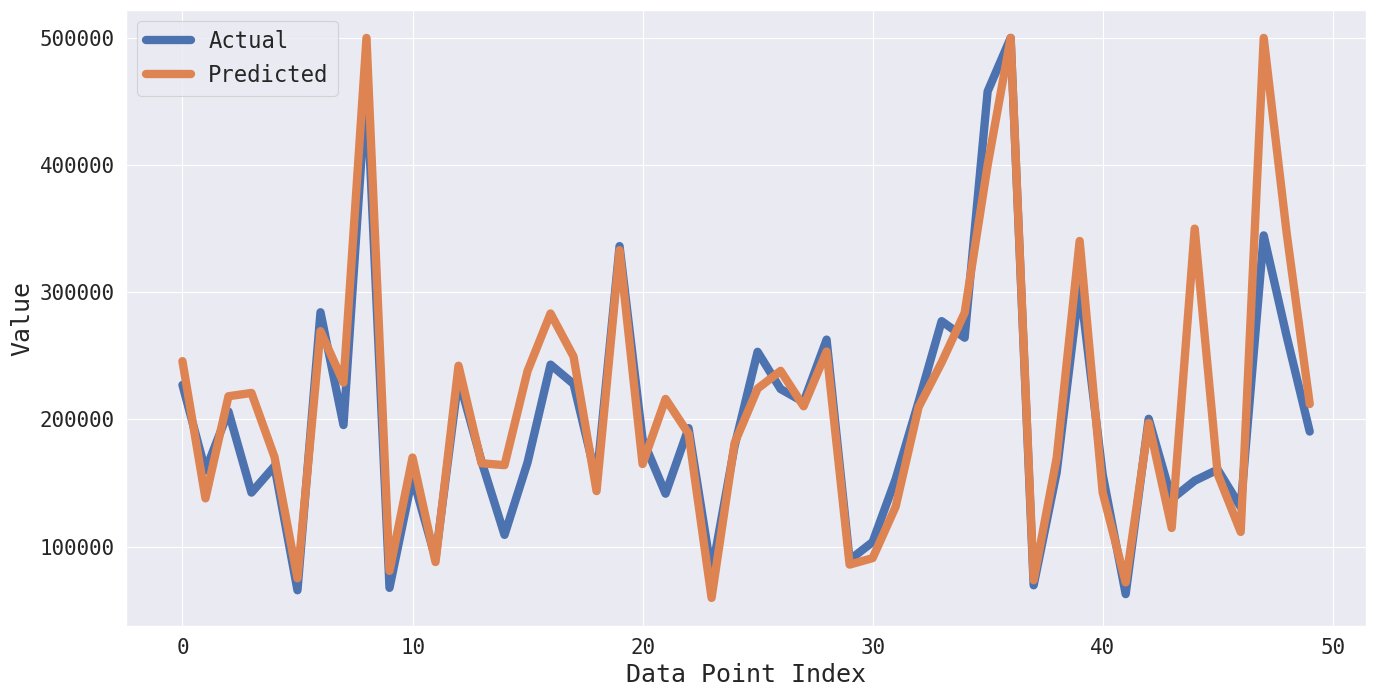

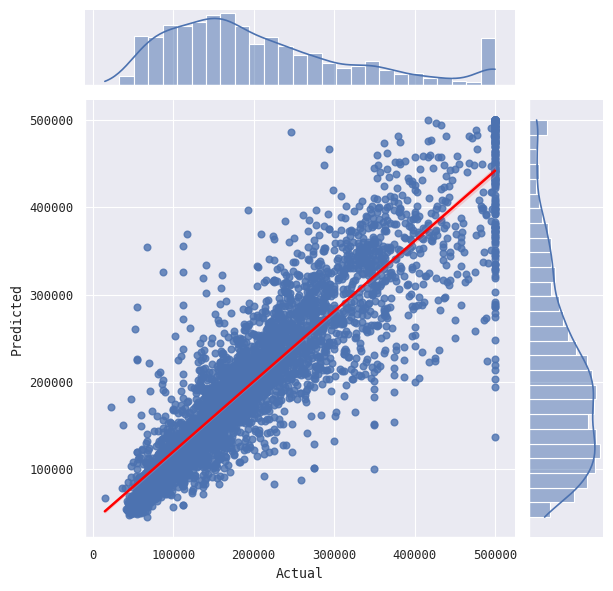

In [45]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(test[:50], linewidth=6) 

ax.set_xlabel('Data Point Index',fontsize=18)
ax.set_ylabel('Value',fontsize=18)
ax.legend(['Actual', 'Predicted'],fontsize=16)
ax.tick_params(axis='both', labelsize=15) 
ax.grid(True)

sns.jointplot(x='Actual', y='Predicted', data=test, kind='reg',line_kws={"color": "red"})

plt.show()

## Comparing the algorithms using Performance Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
lr_r2 = r2_score(y_test, dtree_y_pred)
lr_mse = mean_squared_error(y_test, dtree_y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae= mean_absolute_error(y_test, dtree_y_pred)
print('Decision Tree R2 Score:',lr_r2)
print('Decision Tree MSE:',lr_mse)
print('Decision Tree RMSE:',lr_rmse)
print('Decision Tree mae:',lr_mae)

Decision Tree R2 Score: 0.7278888510816942
Decision Tree MSE: 3721169155.35725
Decision Tree RMSE: 61001.38650356441
Decision Tree mae: 40409.33799069626


In [35]:
lr_r2 = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae= mean_absolute_error(y_test, y_pred)
print('Linear Regression R2 Score:',lr_r2)
print('Linear Regression MSE:',lr_mse)
print('Linear Regression RMSE:',lr_rmse)
print('Linear Regression mae:',lr_mae)

Linear Regression R2 Score: 0.6399236679243399
Linear Regression MSE: 4924108937.911958
Linear Regression RMSE: 70171.99539639697
Linear Regression mae: 51388.700189507734


In [46]:
lr_r2 = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, rfReg_y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae= mean_absolute_error(y_test, rfReg_y_pred)
print('Random Forest R2 Score:',lr_r2)
print('Random Forest MSE:',lr_mse)
print('Random Forest RMSE:',lr_rmse)
print('Random Forest mae:',lr_mae)

Random Forest R2 Score: 0.6399236679243399
Random Forest MSE: 2498176714.8982835
Random Forest RMSE: 49981.76382340147
Random Forest mae: 32591.46795530544
